In [1]:
import pandas as pd
from urllib.parse import urlparse

# CSVファイルのパス
csv_file_path = './data/access.csv'
# CSVファイルを読み込む
df = pd.read_csv(csv_file_path)

# URLに指定された文字列を含んでいるかどうか判定する関数
def filter_str(url):
    lower_url = url.lower()
    if 'zanbil.ir' in lower_url or 'znbl.ir' in lower_url or 'zanbil-ir' in lower_url:
        return '-'
    return url
# URLからドメイン名を抽出する関数
def get_domain(url):
    return urlparse(url).netloc if url != '-' else None

# リファラが空白でないデータをフィルタリングし、不要なドメインを除外
df['Referer'] = df['Referer'].dropna().apply(filter_str)
df_filtered = df[df['Referer'] != '-'].dropna()

# リファラからドメイン名を抽出
df_filtered['Referer_Domain'] = df_filtered['Referer'].apply(get_domain)

# リファラの頻度を計算
referer_counts = df_filtered['Referer'].value_counts()
referer_domain_counts = df_filtered['Referer_Domain'].value_counts()

print(len(referer_counts))
print(len(referer_domain_counts))

25848
358


UserAgent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                        746572
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                         702669
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36                                                                                                     636891
Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0                                                                                                                            552142
Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20100101 Firefox/64.0                                                                                         

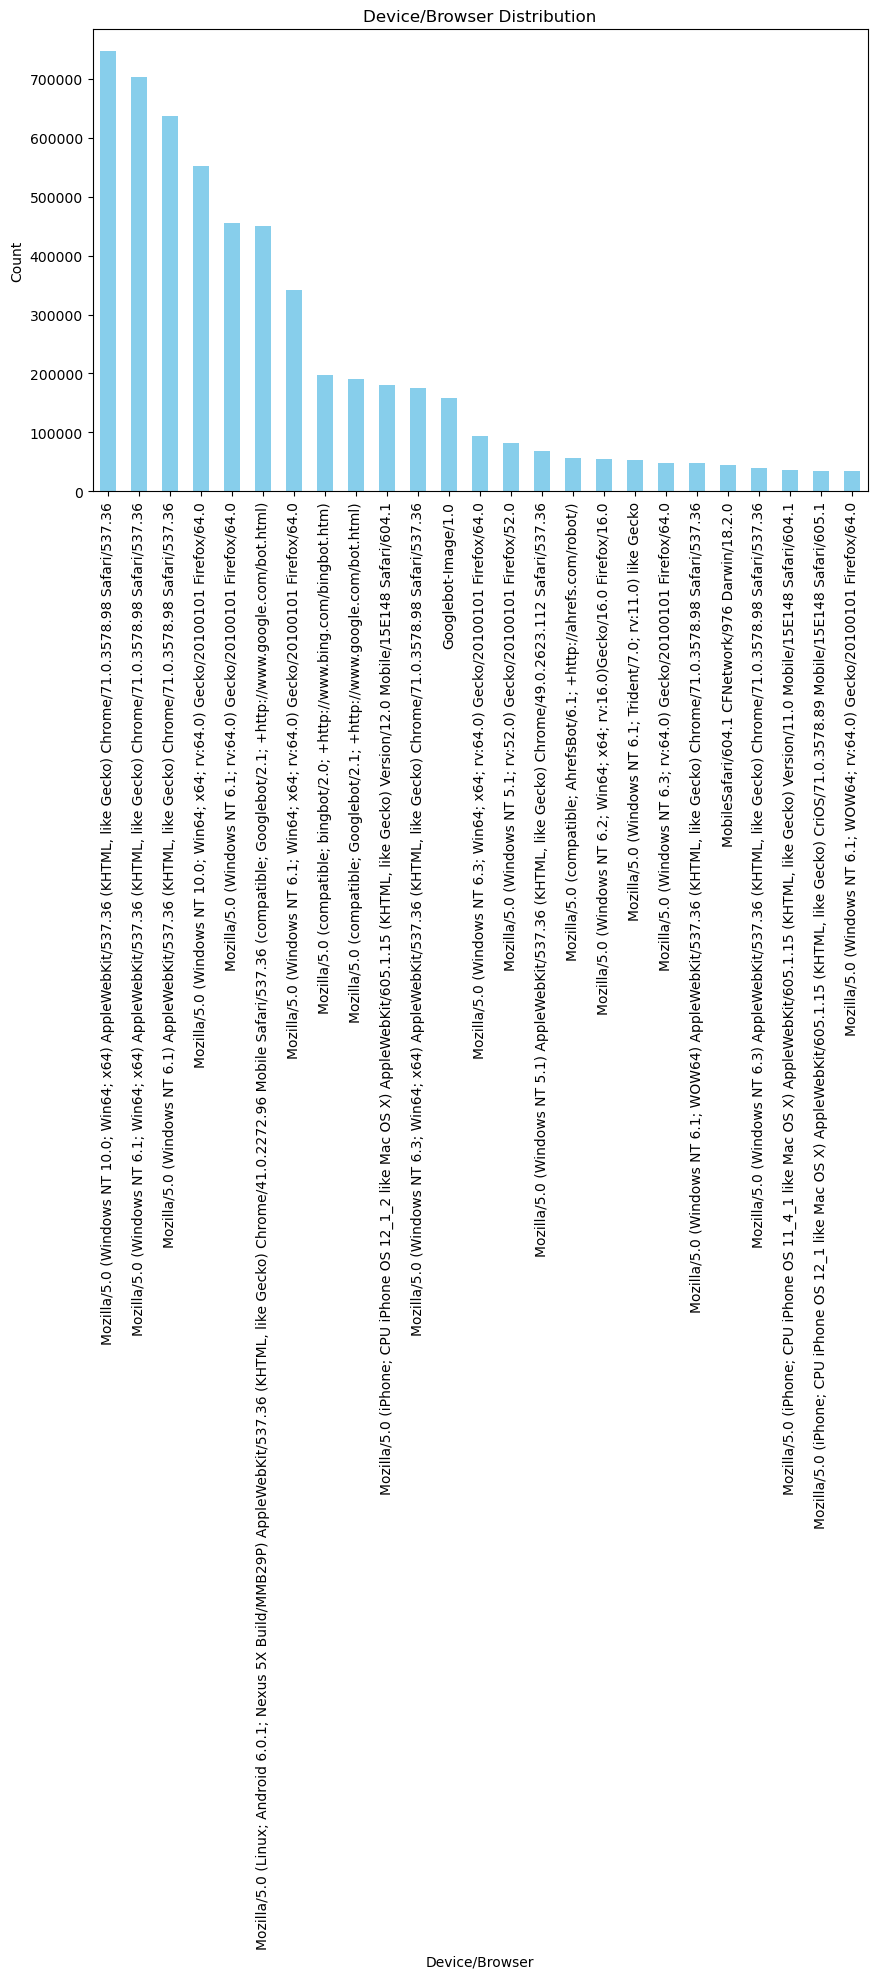

In [2]:

import matplotlib.pyplot as plt
# デバイスやブラウザの分布データを取得
device_distribution = df['UserAgent'].value_counts()

print(device_distribution[:25])
# プロットを作成
plt.figure(figsize=(10, 6))
device_distribution.head(25).plot(kind='bar', color='skyblue')
plt.title('Device/Browser Distribution')
plt.xlabel('Device/Browser')
plt.ylabel('Count')
plt.show()